<a href="https://colab.research.google.com/github/carneiro-fernando/EBAC/blob/main/Exercicios/Modulo_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

In [ ]:
#Baixando o arquivo estados-bruto.xml

! wget https://static.lms.ebaconline.com.br/content-files/8c8d1912-fa5e-4612-b7f6-568301a125bc/original.xml

--2023-03-03 19:53:04--  https://static.lms.ebaconline.com.br/content-files/8c8d1912-fa5e-4612-b7f6-568301a125bc/original.xml
Resolving static.lms.ebaconline.com.br (static.lms.ebaconline.com.br)... 18.230.109.84, 54.94.78.163
Connecting to static.lms.ebaconline.com.br (static.lms.ebaconline.com.br)|18.230.109.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3754 (3.7K) [text/xml]
Saving to: ‘original.xml’

original.xml        100%[===================>]   3.67K  --.-KB/s    in 0s      

2023-03-03 19:53:05 (54.5 MB/s) - ‘original.xml’ saved [3754/3754]



In [ ]:
#Renomeando arquivo baixado
! mv original.xml estados-bruto.xml

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r', encoding="utf8"), 'lxml')

In [ ]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [ ]:
# manipule os dados
import pandas as pd

#Definindo quais os nomes das series(colunas)
dados_de_interesse = ['nome', 'sigla', 'regiao']

#Criando um DataFrame para receber os dados filtrados
dados_limpos_estados_df = pd.DataFrame(columns = dados_de_interesse)

#Para cada serie encontre todos os dados associados
for nome_da_serie in dados_de_interesse:
  dados_limpos_estados_df[[nome_da_serie]] = fonte.find_all(nome_da_serie)

#Trocando o nome da primeira serie de 'nome' para 'estdo'
dados_limpos_estados_df.columns = ['estado'] + dados_de_interesse[1:3]

#Visualizando
dados_limpos_estados_df



,estado,sigla,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE
5,CEARA,CE,NORDESTE
6,DISTRITO FEDERAL,DF,CENTRO-OESTE
7,ESPIRITO SANTO,ES,SUDESTE
8,GOIAS,GO,CENTRO-OESTE
9,MARANHAO,MA,NORDESTE


In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

dados_limpos_estados_df.to_csv(NOME_ARQUIVO_DESTINO, sep=';', encoding='utf-8', index=False)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

In [ ]:
#Carregando o arquivo estados-bruto.xml

! wget https://static.lms.ebaconline.com.br/content-files/3e0d86cb-0ed9-4449-987a-9590509af238/original.csv

--2023-03-03 19:53:06--  https://static.lms.ebaconline.com.br/content-files/3e0d86cb-0ed9-4449-987a-9590509af238/original.csv
Resolving static.lms.ebaconline.com.br (static.lms.ebaconline.com.br)... 18.230.109.84, 54.94.78.163
Connecting to static.lms.ebaconline.com.br (static.lms.ebaconline.com.br)|18.230.109.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48513659 (46M) [application/octet-stream]
Saving to: ‘original.csv’

original.csv        100%[===================>]  46.27M  16.0MB/s    in 2.9s    

2023-03-03 19:53:10 (16.0 MB/s) - ‘original.csv’ saved [48513659/48513659]



In [ ]:
#Renomeando arquivo baixado
! mv original.csv cidades-bruto.csv

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

NOME_ARQUIVO_FONTE_CIDADES = 'cidades-bruto.csv'

fonte_cidades = pd.read_csv(NOME_ARQUIVO_FONTE_CIDADES)

In [ ]:
# visualize os resultados

fonte_cidades

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [ ]:
# manipule os dados

#Estipulando dados de interesse ou colunas
series_de_interesse = ['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']

#Criando DataFrame para receber os dados filtrados
dados_limpos_cidades_df = pd.DataFrame(columns = series_de_interesse)

#Selecionando apenas os valores 2010 na serie Censo
fonte_cidades.loc[(fonte_cidades['Censo']) == 2010]

#Filtrando os dados para o DataFrame novo
for serie in series_de_interesse :
  dados_limpos_cidades_df[[serie]]= fonte_cidades[[serie]]

#Renomeando series
nome_das_series = ['estado', 'cidade', 'populacao', 'PIB', 'PIB_percapita']
dados_limpos_cidades_df.columns = nome_das_series

#Visualizando
dados_limpos_cidades_df

,estado,cidade,populacao,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

dados_limpos_cidades_df.to_csv(NOME_ARQUIVO_DESTINO,sep=';', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3

!pip install unidecode
from unidecode import unidecode

#Definindo constantes com a localização dos arquivos
NOME_ARQUIVO_FONTE_CIDADES = 'cidades-bruto.csv'
NOME_ARQUIVO_FONTE_ESTADOS = 'estados-bruto.xml'

#Lendo os arquivos e transformando em DataFrames
cidades_df = pd.read_csv(NOME_ARQUIVO_FONTE_CIDADES)
estados_df = pd.read_xml(NOME_ARQUIVO_FONTE_ESTADOS)

#Limpandos os dados nulos
cidades_df = cidades_df.fillna('')
estados_df = estados_df.fillna('')

#Renomeando uma coluna em comum para o mesmo nome
cidades_df.columns = cidades_df.columns.str.replace('UF', 'estado')
estados_df.columns = estados_df.columns.str.replace('NOME', 'estado')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 7.0 MB/s eta 0:00:00


In [ ]:
#Normalizando as strings (retirando acentos e caracteres especiais)
cidades_df['estado'] = cidades_df['estado'].apply(unidecode)

#Mesclando os arquivos
merged_df = pd.merge(left=cidades_df, right=estados_df, how='inner', on='estado')

#Visualizando
merged_df

#Exportando como arquivo .csv
merged_df.to_csv('brasil.csv')

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
brasil_df = pd.read_csv('brasil.csv')
brasil_df

,Unnamed: 0,FID,gid,estado,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom,ID,IDCAPITAL,SIGLA,REGIAO
0,0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...,5,536,BA,NORDESTE
1,1,vw_pib_percapita.fid-4514e25a_17aaa325034_-2576,4559,BAHIA,Maetinga,2010.0,2.355845e+04,7884,2988.129883,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.434440905792826 -14.551186...,5,536,BA,NORDESTE
2,2,vw_pib_percapita.fid-4514e25a_17aaa325034_-256b,4475,BAHIA,Ibirapuã,2010.0,7.499741e+04,7893,9501.759766,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-40.1333701304941 -17.63887741...,5,536,BA,NORDESTE
3,3,vw_pib_percapita.fid-4514e25a_17aaa325034_-2565,4459,BAHIA,Governador Mangabeira,2010.0,9.290382e+04,20668,4495.060059,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-39.008359369195716 -12.567865...,5,536,BA,NORDESTE
4,4,vw_pib_percapita.fid-4514e25a_17aaa325034_-2561,4478,BAHIA,Ibititá,2010.0,6.236689e+04,19410,3213.129883,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.87084350357412 -11.4950176...,5,536,BA,NORDESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-1187,1356,AMAPA,Serra do Navio,2010.0,1.097953e+05,3982,27572.900391,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-52.024338017088795 2.43550921...,3,131,AP,NORTE
5562,5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-103f,1361,AMAPA,Ferreira Gomes,2010.0,6.993773e+04,5475,12774.009766,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-51.39188591230295 1.316958828...,3,131,AP,NORTE
5563,5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-1009,1370,AMAPA,Tartarugalzinho,2010.0,1.199880e+05,13769,8714.360352,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-51.29572958019844 1.696799567...,3,131,AP,NORTE
5564,5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-f29,1364,AMAPA,Macapá,2010.0,4.679694e+06,366484,12769.160156,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.0580289939063 0.8424719447...,3,131,AP,NORTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
brasil_df.sort_values(by = ['Pop_est_2009'], ascending=False, ignore_index=True).head(10)

,Unnamed: 0,FID,gid,estado,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom,ID,IDCAPITAL,SIGLA,REGIAO
0,3278,vw_pib_percapita.fid-4514e25a_17aaa325034_-1130,5088,SAO PAULO,São Paulo,2010.0,389317152.0,11037593,35271.929688,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-46.53616590160792 -23.3625463...,24,4361,SP,SUDESTE
1,4512,vw_pib_percapita.fid-4514e25a_17aaa325034_-227e,2001,RIO DE JANEIRO,Rio de Janeiro,2010.0,175739344.0,6186710,28405.949219,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-43.109141023447734 -22.768805...,18,2779,RJ,SUDESTE
2,44,vw_pib_percapita.fid-4514e25a_17aaa325034_-2388,124,BAHIA,Salvador,2010.0,32824228.0,2998056,10948.500000,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-38.622239087346124 -12.751296...,5,536,BA,NORDESTE
3,5565,vw_pib_percapita.fid-4514e25a_17aaa325034_-18fa,835,DISTRITO FEDERAL,Brasília,2010.0,131487264.0,2606885,50438.460938,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-47.3805248571471 -16.05027785...,7,916,DF,CENTRO-OESTE
4,4228,vw_pib_percapita.fid-4514e25a_17aaa325034_-12bf,2276,CEARA,Fortaleza,2010.0,31789186.0,2505552,12687.500000,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-38.42283838031695 -3.81699225...,6,676,CE,NORDESTE
5,1736,vw_pib_percapita.fid-4514e25a_17aaa325034_-1162,2911,MINAS GERAIS,Belo Horizonte,2010.0,44595204.0,2452617,18182.699219,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-43.94578447883935 -19.7767905...,27,4790,MG,SUDESTE
6,4860,vw_pib_percapita.fid-4514e25a_17aaa325034_-1de7,5136,PARANA,Curitiba,2010.0,45762420.0,1851215,24720.210938,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-49.233532767600124 -25.350653...,15,2002,PR,SUL
7,3727,vw_pib_percapita.fid-4514e25a_17aaa325034_-2442,1572,AMAZONAS,Manaus,2010.0,40486108.0,1738641,23286.060547,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-60.001611142130734 -2.1191118...,4,178,AM,NORTE
8,2439,vw_pib_percapita.fid-4514e25a_17aaa325034_-1695,253,PERNAMBUCO,Recife,2010.0,24835340.0,1561659,15903.179688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-34.9913687601354 -7.936765643...,16,2439,PE,NORDESTE
9,2628,vw_pib_percapita.fid-4514e25a_17aaa325034_-1005,2213,PARA,Belém,2010.0,16526989.0,1437600,11496.240234,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-48.30138694444446 -1.10599777...,13,1561,PA,NORTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
brasil_df.query('REGIAO == "NORDESTE"').sort_values(by= ['PIB_percapita'], ignore_index=True).head()

,Unnamed: 0,FID,gid,estado,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom,ID,IDCAPITAL,SIGLA,REGIAO
0,4471,vw_pib_percapita.fid-4514e25a_17aaa325034_-11ba,2496,MARANHAO,São Vicente Ferrer,2010.0,39492.960938,20463,1929.969971,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-44.820975515987854 -2.8021265...,10,1309,MA,NORDESTE
1,4366,vw_pib_percapita.fid-4514e25a_17aaa325034_-1c3c,2127,MARANHAO,Cajapió,2010.0,22781.035156,10337,2203.830078,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-44.427988387368124 -2.7099774...,10,1309,MA,NORDESTE
2,69,vw_pib_percapita.fid-4514e25a_17aaa325034_-2244,2192,BAHIA,Lamarão,NaN,30241.320312,12995,2327.149902,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-38.831295946714796 -11.773438...,5,536,BA,NORDESTE
3,1849,vw_pib_percapita.fid-4514e25a_17aaa325034_-2528,1090,PIAUI,Dom Inocêncio,2010.0,25457.230469,10795,2358.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-42.11223400164648 -8.58192312...,17,2704,PI,NORDESTE
4,4491,vw_pib_percapita.fid-4514e25a_17aaa325034_-f64,2525,MARANHAO,Timbiras,2010.0,63724.851562,26909,2368.159912,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-43.66623800794751 -3.99985689...,10,1309,MA,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
brasil_df.loc[brasil_df['estado'] == 'SAO PAULO'].sort_values(by= ['PIB'], ignore_index=True, ascending=False).loc[0:14]

,Unnamed: 0,FID,gid,estado,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom,ID,IDCAPITAL,SIGLA,REGIAO
0,3278,vw_pib_percapita.fid-4514e25a_17aaa325034_-1130,5088,SAO PAULO,São Paulo,2010.0,389317152.0,11037593,35271.929688,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-46.53616590160792 -23.3625463...,24,4361,SP,SUDESTE
1,3230,vw_pib_percapita.fid-4514e25a_17aaa325034_-1308,5046,SAO PAULO,Guarulhos,2010.0,32473828.0,1299283,24993.650391,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-46.35729098920982 -23.3248492...,24,4361,SP,SUDESTE
2,3347,vw_pib_percapita.fid-4514e25a_17aaa325034_-f37,4964,SAO PAULO,Campinas,2010.0,31654720.0,1064669,29731.980469,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-46.90107908421256 -22.7654838...,24,4361,SP,SUDESTE
3,3112,vw_pib_percapita.fid-4514e25a_17aaa325034_-170a,5065,SAO PAULO,Osasco,2010.0,31616452.0,718646,43994.468750,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-46.7777279871156 -23.46460916...,24,4361,SP,SUDESTE
4,2815,vw_pib_percapita.fid-4514e25a_17aaa325034_-21ba,1679,SAO PAULO,São Bernardo do Campo,2010.0,28935768.0,810979,35680.050781,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-46.564455514581 -23.647633414...,24,4361,SP,SUDESTE
5,3351,vw_pib_percapita.fid-4514e25a_17aaa325034_-f18,5004,SAO PAULO,Barueri,2010.0,26908070.0,270173,99595.703125,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-46.79712466707602 -23.4684027...,24,4361,SP,SUDESTE
6,2772,vw_pib_percapita.fid-4514e25a_17aaa325034_-234f,5086,SAO PAULO,Santos,2010.0,22546134.0,417098,54054.761719,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-46.2242826669002 -23.74234770...,24,4361,SP,SUDESTE
7,2999,vw_pib_percapita.fid-4514e25a_17aaa325034_-1b2d,5134,SAO PAULO,São José dos Campos,2010.0,22018042.0,615871,35751.058594,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-45.8722455727497 -22.86649804...,24,4361,SP,SUDESTE
8,3019,vw_pib_percapita.fid-4514e25a_17aaa325034_-1a69,5058,SAO PAULO,Jundiaí,2010.0,16585137.0,349929,47395.718750,Produto Interno Bruto per capita,22144.80 - 52702.10,3,MULTIPOLYGON (((-46.79160581372197 -23.1009531...,24,4361,SP,SUDESTE
9,2821,vw_pib_percapita.fid-4514e25a_17aaa325034_-2189,1613,SAO PAULO,Santo André,2010.0,14709603.0,673396,21843.910156,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.535091604708214 -23.612465...,24,4361,SP,SUDESTE


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
brasil_df.loc[brasil_df['estado'] == 'SANTA CATARINA']['PIB'].agg('sum')

129806256.75195317

 - Qual é o população da região sul?

In [ ]:
brasil_df.loc[brasil_df['REGIAO'] == 'SUL']['Pop_est_2009'].agg('sum')

27719118

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
brasil_df.loc[brasil_df['estado'] == 'MATO GROSSO DO SUL']['PIB_percapita'].agg('mean')

14458.896859975644

 - Qual é a população do Brasil?

In [ ]:
brasil_df['Pop_est_2009'].agg('sum')

191501418

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<AxesSubplot:xlabel='nome'>

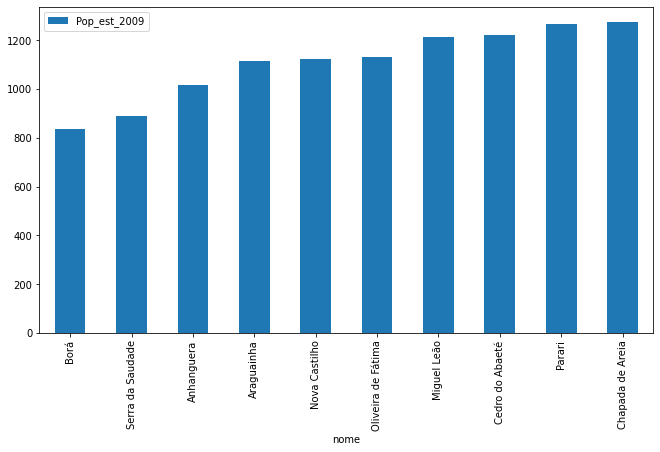

In [ ]:
#Ordenando por população
plot_10menospop_df = brasil_df.sort_values(by= ['Pop_est_2009'], ignore_index=True).head(10)[['nome', 'Pop_est_2009']]

#Plotando gráfico
plot_10menospop_df.plot.bar(x='nome', y='Pop_est_2009', figsize=(11, 6))

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<AxesSubplot:ylabel='Pop_est_2009'>

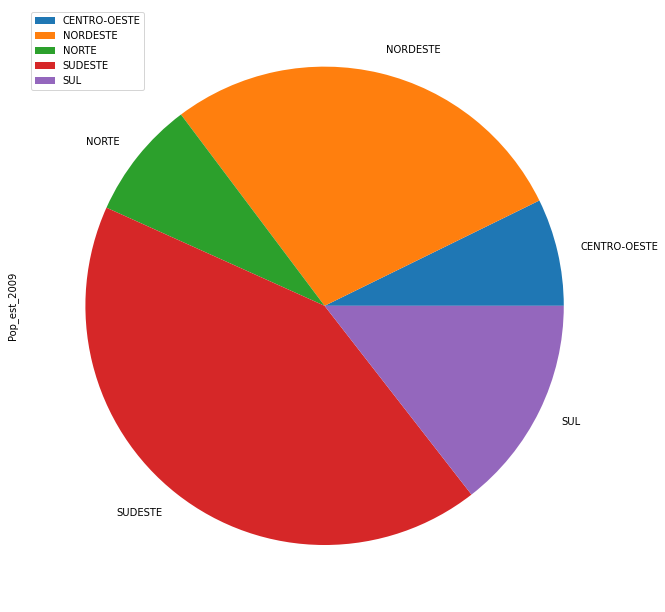

In [ ]:
#Agrupando por região
plot_pop_regiao_df = brasil_df[['REGIAO','Pop_est_2009']].groupby(by='REGIAO').agg('sum')

#Plotando gráfico
plot_pop_regiao_df.plot.pie(y='Pop_est_2009', figsize=(14, 11))